## hello_sp.py

このスクリプトは、以下の3つの入力値セットに対する空間プーラーの効果を示す3つの例を提供します。

1. 3 つのランダムな入力値の出力 SDR を表示する。
2. 同じ入力値から生成された 3 つの SDR を表示する。
3. 元の入力ベクトルに10%と20%のノイズを追加して、わずかに異なる入力値で生成された3つのSDRを表示する。

このスクリプトでは、入力に単純なバイナリ ベクトルを使用しています。

この例を実行して出力を読んだ後、空間プーラーの入力と出力の関係を基本的に理解する必要があります。

In [6]:
"""空間プーラーの動作を示す簡単なプログラム"""

from htm.bindings.sdr import SDR
from htm.algorithms import SpatialPooler as SP

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
%matplotlib inline

In [7]:
# Spatial Pooler と、それを使用するために必要な SDR データ構造を作成します

inputSDR  = SDR( dimensions = (32, 32) )
activeSDR = SDR( dimensions = (64, 64) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

def run():
    print("Running the Spatial Pooler ...")
    print("")
    sp.compute(inputSDR, True, activeSDR)
    print("Active Outputs " + str(activeSDR))
    print("")

    #clear_output(wait = True)
    #plt.cla
    plt.imshow(activeSDR.dense, cmap = "Blues")
    plt.pause(0.01)


Hello Spatial Pooler.


レッスン1）異なる入力は、異なる出力を与えます
    3つのランダムな疎分散表現(SDR)を生成し、それぞれを実行します
    空間プーラーを通して  出力アクティビティが毎回異なることを観察します

----------------------------------------------------------------------
Random Input SDR( 32, 32 ) 48, 123, 165, 226, 257, 298, 316, 457, 488, 517, 554, 559, 587, 636, 701, 753, 764, 864, 916, 971



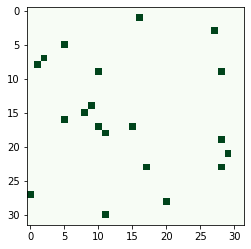

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 146, 157, 270, 331, 450, 511, 535, 615, 621, 700, 838, 1073, 1520, 1697, 1711, 1982, 2246, 2292, 2298, 2308, 2309, 2414, 2564, 2786, 2787, 2837, 2838, 2841, 2859, 2878, 2926, 2932, 2970, 2999, 3000, 3023, 3035, 3053, 3085, 3118, 3120, 3141, 3149, 3155, 3161, 3212, 3241, 3253, 3285, 3322, 3325, 3334, 3347, 3348, 3362, 3369, 3423, 3430, 3526, 3557, 3558, 3575, 3596, 3602, 3612, 3622, 3751, 3757, 3762, 3805, 3835, 3875, 3881, 3913, 3942, 3966, 3978, 3997, 4039, 4070, 4086



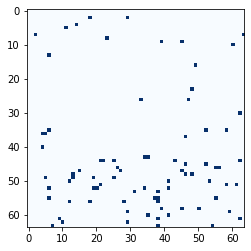

----------------------------------------------------------------------
Random Input SDR( 32, 32 ) 4, 29, 92, 150, 251, 271, 277, 400, 402, 407, 512, 528, 579, 619, 640, 643, 712, 797, 952, 1012



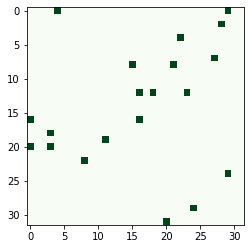

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 166, 237, 395, 439, 487, 629, 706, 739, 778, 906, 939, 1052, 1053, 1063, 1139, 1157, 1285, 1293, 1681, 1773, 1847, 1900, 1918, 2073, 2138, 2199, 2383, 2468, 2476, 2525, 2582, 2650, 2745, 2775, 2846, 2976, 3028, 3046, 3082, 3156, 3161, 3170, 3171, 3196, 3215, 3222, 3239, 3259, 3266, 3269, 3275, 3328, 3352, 3408, 3432, 3442, 3486, 3495, 3566, 3657, 3658, 3721, 3750, 3752, 3764, 3777, 3789, 3808, 3821, 3834, 3836, 3847, 3848, 3852, 3875, 3958, 3964, 4026, 4049, 4052, 4078



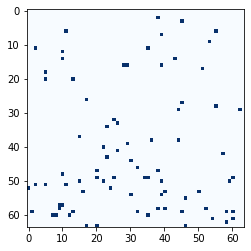

----------------------------------------------------------------------
Random Input SDR( 32, 32 ) 21, 50, 130, 207, 239, 282, 285, 316, 353, 374, 481, 653, 676, 758, 789, 808, 851, 949, 980, 1014



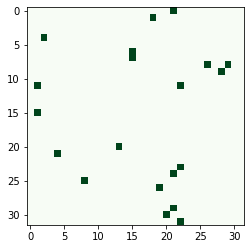

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 116, 157, 159, 187, 225, 285, 316, 576, 625, 788, 842, 873, 875, 949, 950, 981, 1002, 1020, 1349, 1360, 1588, 1686, 1695, 1732, 1803, 1819, 1831, 1863, 1866, 2014, 2168, 2208, 2272, 2400, 2420, 2425, 2459, 2490, 2565, 2589, 2685, 2766, 2790, 2839, 3083, 3096, 3127, 3211, 3218, 3253, 3362, 3389, 3409, 3471, 3476, 3576, 3578, 3590, 3596, 3636, 3646, 3669, 3689, 3690, 3698, 3753, 3755, 3781, 3850, 3869, 3885, 3886, 3914, 3917, 3962, 3965, 3979, 3986, 4003, 4025, 4077



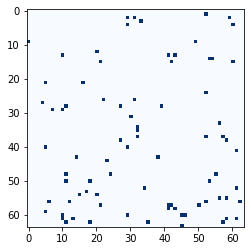

Spatial Pooler Connections:
    Inputs (1024) ~> Outputs (4096) via Segments (4096)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 512 / 512 / 512
    Connected Synapses on Segment Min/Mean/Max 218 / 255.915 / 300
    Synapses Dead (0.0045619%) Saturated (2.52724e-05%)
    Synapses pruned (0%) Segments pruned (0%)



In [9]:
# レッスン1 ランダム入力を試してみる
print("")
print("Hello Spatial Pooler.")
print("")
print("")
print("レッスン1）異なる入力は、異なる出力を与えます")
print("    3つのランダムな疎分散表現(SDR)を生成し、それぞれを実行します")
print("    空間プーラーを通して  出力アクティビティが毎回異なることを観察します")
print("")

for i in range(3):
    print("----------------------------------------------------------------------")
    inputSDR.randomize( .02 )
    print("Random Input " + str(inputSDR))
    print("")
    
    #clear_output(wait = True)
    #plt.cla
    plt.imshow(inputSDR.dense, cmap = "Greens")
    plt.pause(0.01)
    
    run()
print(sp)



レッスン2) 同一の入力は同一の出力を与える
    入力SDRは、空間プーラーの前の実行で使用されたものと同じである

Input SDR( 32, 32 ) 27, 144, 184, 223, 242, 398, 402, 430, 474, 507, 564, 599, 679, 794, 856, 897, 936, 995, 1017, 1023



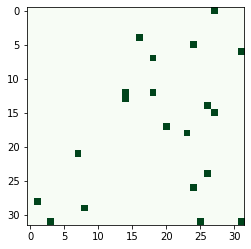

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 108, 152, 316, 464, 680, 693, 753, 798, 805, 934, 946, 1054, 1075, 1099, 1114, 1149, 1179, 1322, 1333, 1395, 1529, 1544, 1698, 1719, 1908, 1986, 2010, 2220, 2242, 2373, 2433, 2446, 2459, 2518, 2531, 2595, 2650, 2684, 2858, 2941, 2977, 2991, 3000, 3016, 3048, 3054, 3067, 3105, 3183, 3232, 3241, 3266, 3286, 3292, 3294, 3326, 3387, 3406, 3409, 3410, 3427, 3433, 3440, 3460, 3469, 3492, 3511, 3578, 3634, 3647, 3663, 3695, 3710, 3760, 3839, 3857, 3892, 3909, 3963, 3974, 4030



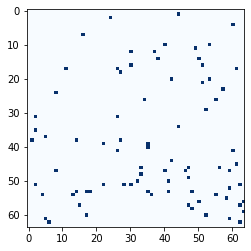

In [4]:
# レッスン２ 同一の入力を試す
print("=" * 70)
print("")
print("")
print("レッスン2) 同一の入力は同一の出力を与える")
print("    入力SDRは、空間プーラーの前の実行で使用されたものと同じである")
print("")
print("Input " + str(inputSDR))
print("")

plt.imshow(inputSDR.dense, cmap = "Greens")
plt.pause(0.01)
    
run()



レッスン3）似たような入力は似たような出力を与えます
          今は入力SDRを少し変えています
          1を0に、0を1に少しずつ変えていきます
          結果として得られるSDRは、元のSDRと類似していますが、同一ではありません

前の実行から入力SDRに10%のノイズを追加します
Input SDR( 32, 32 ) 17, 27, 144, 184, 223, 242, 398, 430, 474, 507, 599, 679, 743, 794, 856, 897, 936, 995, 1017, 1023



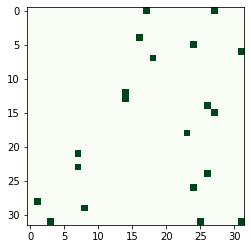

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 15, 108, 118, 152, 160, 316, 668, 680, 693, 798, 805, 854, 885, 946, 1046, 1054, 1064, 1075, 1099, 1114, 1149, 1179, 1253, 1333, 1395, 1529, 1544, 1698, 1986, 2015, 2134, 2220, 2242, 2282, 2373, 2433, 2446, 2495, 2518, 2531, 2533, 2595, 2645, 2650, 2657, 2684, 2739, 2858, 2977, 2979, 2991, 3010, 3016, 3048, 3067, 3105, 3175, 3183, 3232, 3266, 3292, 3294, 3406, 3409, 3427, 3433, 3492, 3578, 3682, 3695, 3710, 3726, 3760, 3839, 3857, 3890, 3892, 3909, 3963, 3996, 4030



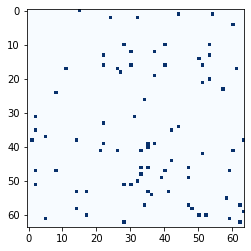

出力SDRがほとんど変化していないことに注目してください


入力SDRにさらに20%のノイズを追加
Input SDR( 32, 32 ) 27, 144, 178, 184, 223, 242, 286, 398, 430, 474, 537, 599, 639, 743, 794, 856, 897, 936, 995, 1017



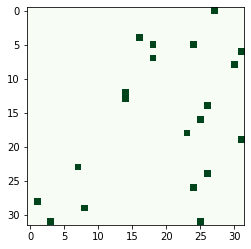

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 30, 108, 118, 126, 152, 232, 248, 264, 287, 302, 316, 464, 693, 805, 1008, 1046, 1054, 1075, 1114, 1179, 1253, 1333, 1431, 1495, 1587, 1698, 1802, 2220, 2373, 2433, 2446, 2495, 2518, 2533, 2568, 2595, 2609, 2645, 2650, 2657, 2696, 2852, 2875, 2940, 2957, 2979, 2991, 3016, 3067, 3105, 3183, 3232, 3294, 3406, 3409, 3461, 3462, 3465, 3484, 3492, 3509, 3536, 3576, 3578, 3582, 3637, 3639, 3648, 3672, 3682, 3695, 3710, 3745, 3857, 3890, 3892, 3952, 3963, 3998, 4003, 4030



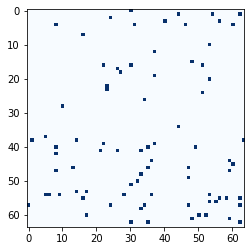

今までの出力SDRとは大きく異なります
しかし、出力の間にはまだ似たようなものがあります

End.


In [5]:
# レッスン3、似たような入力を試してみる
print("=" * 70)
print("")
print("")
print("レッスン3）似たような入力は似たような出力を与えます")
print("          今は入力SDRを少し変えています")
print("          1を0に、0を1に少しずつ変えていきます")
print("          結果として得られるSDRは、元のSDRと類似していますが、同一ではありません")
print("")

print("前の実行から入力SDRに10%のノイズを追加します")
inputSDR.addNoise(0.10)
print("Input " + str(inputSDR))
print("")
plt.imshow(inputSDR.dense, cmap = "Greens")
plt.pause(0.01)
run()

print("出力SDRがほとんど変化していないことに注目してください")
print("")
print("")
print("入力SDRにさらに20%のノイズを追加")
inputSDR.addNoise(0.2)
print("Input " + str(inputSDR))
print("")
plt.imshow(inputSDR.dense, cmap = "Greens")
plt.pause(0.01)
run()

print("今までの出力SDRとは大きく異なります")
print("しかし、出力の間にはまだ似たようなものがあります")
print("")
print("End.")